# 1. Introduction
### Project Overview:
>The goal of this deep learning image classification project is to develop an accurate and robust model capable of classifying Habesha dresses as either men's or women's attire. The rich cultural diversity of the Habesha community warrants the need for specialized dress classification to cater to gender-specific preferences and traditions. By employing cutting-edge deep learning techniques, we aim to create a reliable model that can identify and distinguish between men's and women's Habesha dresses with high precision.

### Dataset Description:
>The dataset used for this image classification project comprises a diverse collection of labeled images of Habesha dresses. The dataset has been carefully curated, ensuring a balanced representation of men's and women's attire. Each image is annotated with its corresponding label, enabling supervised learning for training the deep learning model. The dataset is a valuable resource for achieving our objective of accurate classification, and we will explore its properties and characteristics to better understand the task at hand.

### Importance of Habesha Dress Classification:
>The Habesha community, with its rich cultural heritage and traditions, places significant emphasis on dress codes that differ based on gender. Accurate classification of men's and women's Habesha dresses has diverse applications, including personalized online shopping experiences, cultural preservation, and enhancing gender-specific fashion choices. Moreover, a robust classification model can assist in inventory management and improve marketing strategies for Habesha clothing businesses.

### Challenges and Opportunities:
>This image classification project comes with several challenges, such as variations in dress styles, color palettes, and image qualities. Furthermore, distinguishing between subtle gender-specific dress features demands a powerful deep learning model capable of learning intricate patterns effectively. To address these challenges, we will employ data augmentation techniques and explore transfer learning approaches using pretrained models to leverage existing knowledge.

### Project Outline:
>In this Jupyter Notebook, we will go through the various stages of the deep learning image classification pipeline. The project outline is as follows:
**Data Preprocessing:** We will clean and preprocess the dataset, handling any missing or corrupted images, and ensuring a consistent format for model input.

**Data Exploration and Analysis:** An initial exploration of the dataset will be conducted, examining class distributions and visualizing sample images to gain insights.

**Model Architecture:** We will design a convolutional neural network (CNN) model to learn the intricate features of Habesha dresses for gender classification.

**Model Training**: The model will be trained using the prepared dataset, and training performance will be monitored to prevent overfitting.

**Model Evaluation:** The trained model will be evaluated on a separate test set to assess its classification accuracy and generalization capability.

**Hyperparameter Tuning:** To optimize model performance, we will explore hyperparameter tuning techniques.

**Model Fine-Tuning:** Additionally, transfer learning will be explored to enhance the model's performance by leveraging pretrained models.

**Conclusion**: Finally, we will summarize the results and draw insights from the project. We will discuss potential applications and areas for future improvements.

>Throughout this project, we aim to achieve a high-performing model that can effectively classify Habesha dresses based on gender, contributing to a better understanding of cultural fashion preferences and facilitating tailored clothing choices for individuals.







# 2. Install Dependencies and Setup

In [1]:
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
# !pip list

In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2
import imghdr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [4]:
# Avoid OOM(Out of Memory) errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)  # to dynamically allocate GPU memory on-demand

In [5]:
tf.config.list_physical_devices('GPU')  # to retrieve a list of all available physical GPUs  in the system that TensorFlow can detect. 

[]

# 3. Remove dodgy images
Blurry or Low-Quality Images,Noisy Images,Corrupted or Damaged Images,Duplicate Images,Unrepresentative Images,Unsupported Image Formats or extensions must be removed

In [6]:
data_dir = 'data' 

In [7]:
# Remove .svg and .webp images
image_exts = ['jpeg','jpg', 'bmp', 'png']

About the ff code snippet
* os.path.join(data_dir, image_class) to create the path to the current class directory, and os.listdir() to list the images within that directory.
*  creates the complete path to the image using os.path.join(data_dir, image_class, image). image is the filename of the current image in the loop.
*  to read the image using OpenCV (cv2.imread(image_path)). 
*  checks the image's file type using imghdr.what(image_path) 
* stores the result in the tip variable.
* checks if the image file type (tip) is not in the image_exts list. 
* If the image is not in the accepted format, it prints a message indicating that the image is not in the extension list and proceeds to remove the image using os.remove(image_path).
* If the image cannot be read properly or if any exception occurs during the process, the code catches the exception  and prints an error message indicating an issue with the image.


In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 4. Load Data

In [9]:
#  create a labeled dataset from images stored in a directory structure.
data = tf.keras.utils.image_dataset_from_directory('data')

Found 349 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

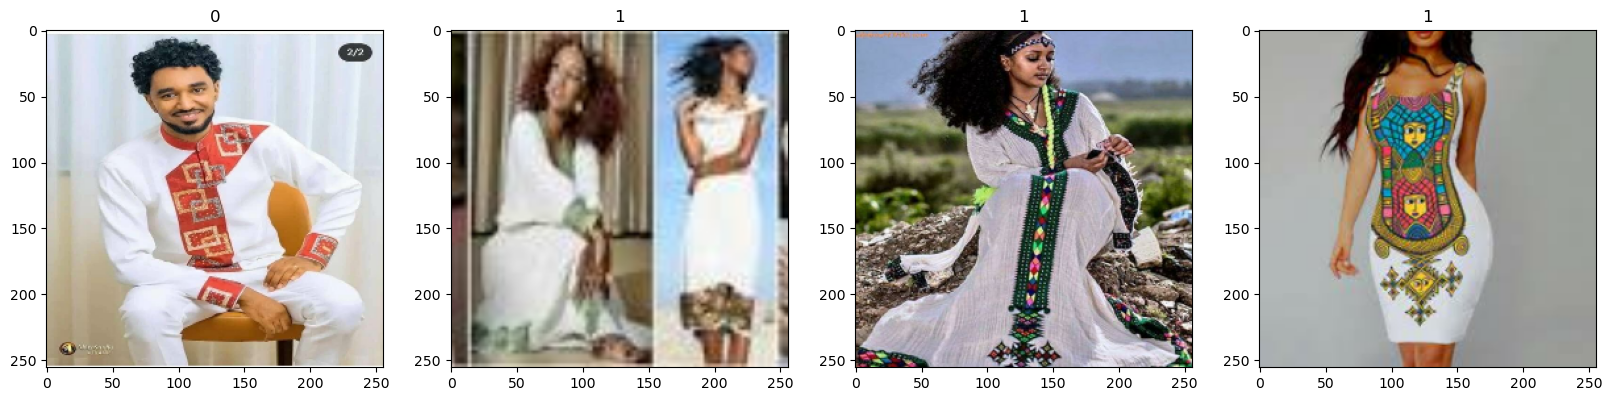

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 5. Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

# 6. Split Data

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

7

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 7. Build Deep Learning Model

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 8. Train

In [23]:
logdir='logs'

In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [25]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 8s 851ms/step - loss: 0.9405 - accuracy: 0.5223 - val_loss: 0.6874 - val_accuracy: 0.5312
Epoch 2/20
7/7 [==============================] - 7s 848ms/step - loss: 0.6886 - accuracy: 0.5179 - val_loss: 0.6850 - val_accuracy: 0.4531
Epoch 3/20
7/7 [==============================] - 7s 836ms/step - loss: 0.6803 - accuracy: 0.6027 - val_loss: 0.6505 - val_accuracy: 0.7188
Epoch 4/20
7/7 [==============================] - 7s 844ms/step - loss: 0.6178 - accuracy: 0.7009 - val_loss: 0.6849 - val_accuracy: 0.5469
Epoch 5/20
7/7 [==============================] - 7s 875ms/step - loss: 0.6371 - accuracy: 0.6518 - val_loss: 0.5530 - val_accuracy: 0.8281
Epoch 6/20
7/7 [==============================] - 7s 835ms/step - loss: 0.5134 - accuracy: 0.7991 - val_loss: 0.4477 - val_accuracy: 0.7812
Epoch 7/20
7/7 [==============================] - 7s 836ms/step - loss: 0.4761 - accuracy: 0.7857 - val_loss: 0.3385 - val_accuracy: 0.9062
Epoch 8/20
7/7 [====

# 9. Plot Performance

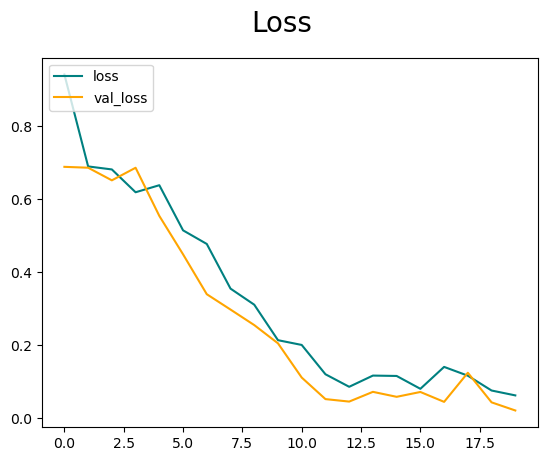

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

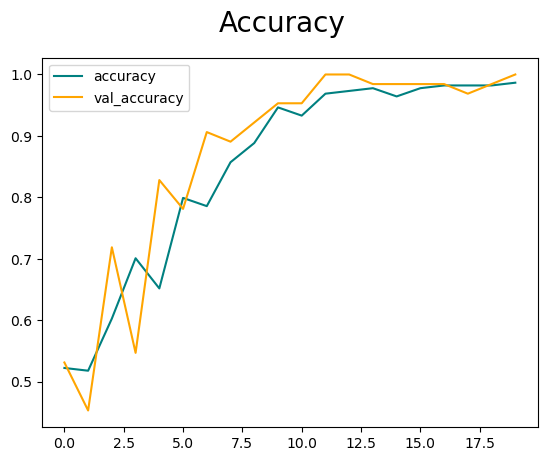

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 10. Evaluate

In [28]:
len(test)

1

In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 356ms/step


In [31]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall: 1.0, Accuracy:1.0


## Confusion Matrix

In [32]:
y

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0])

In [33]:
yhat

array([[9.5950776e-01],
       [9.9505037e-01],
       [1.5536357e-06],
       [9.9698609e-01],
       [9.8863101e-01],
       [1.1040841e-02],
       [2.5736194e-02],
       [7.7283382e-01],
       [9.9617398e-01],
       [2.2226470e-02],
       [9.8581296e-01],
       [9.9955714e-01],
       [1.4084963e-04],
       [9.2906952e-01],
       [9.9740660e-01],
       [3.6138861e-04],
       [1.7660307e-02],
       [9.8563647e-01],
       [9.2711401e-01],
       [9.9579704e-01],
       [6.7244349e-03],
       [9.9975044e-01],
       [9.9344790e-01],
       [9.8925954e-01],
       [9.9996293e-01],
       [2.4767560e-03],
       [9.5492342e-06],
       [9.9930429e-01],
       [9.9760354e-01],
       [1.3308986e-03],
       [9.9577904e-01],
       [5.5051206e-08]], dtype=float32)

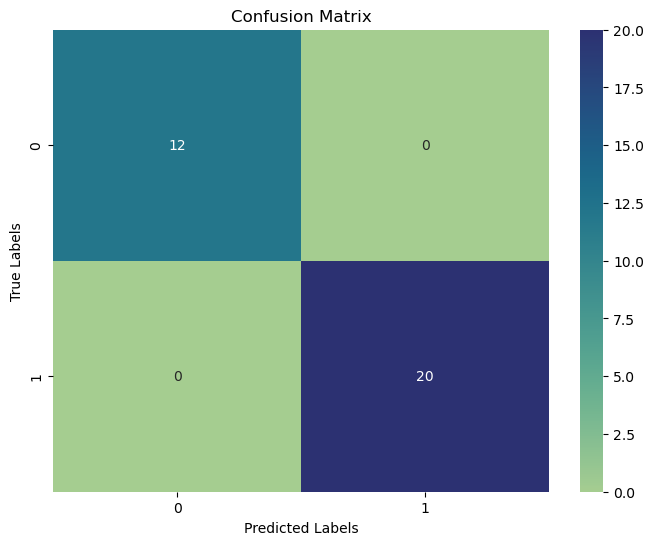

In [34]:
# Define a threshold for classification
threshold = 0.5

# Convert continuous predictions to binary class labels
yhatt = [1 if pred >= threshold else 0 for pred in yhat]

# Create the confusion matrix
cm = confusion_matrix(y, yhatt)

# Get the class labels
class_labels = np.unique(np.concatenate((y, yhatt)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="crest", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 11. Test

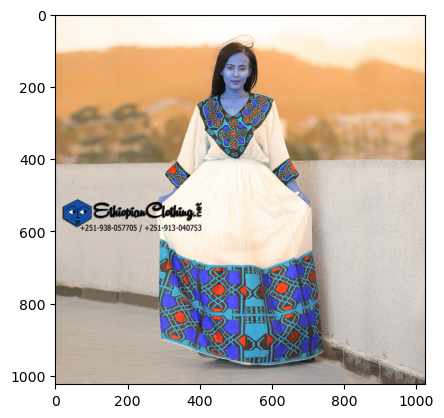

In [35]:
img = cv2.imread('women_test.jpg')
plt.imshow(img)
plt.show()

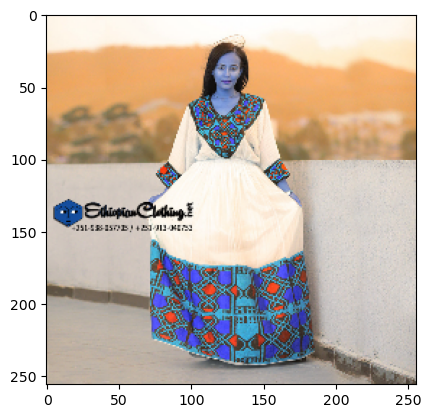

In [36]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 86ms/step


In [38]:
yhat

array([[0.9865555]], dtype=float32)

In [39]:
if yhat > 0.5: 
    print(f'Predicted class is Women_Dress')
else:
    print(f'Predicted class is Men_Dress')

Predicted class is Women_Dress


# 12. Save the Model

In [40]:
model.save(os.path.join('built_model','dress_classifier.h5'))

In [41]:
new_model = load_model('built_model/dress_classifier.h5')

In [42]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 68ms/step


array([[0.9865555]], dtype=float32)

# ------------------ END --------------------